In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()
sns.set(style="darkgrid")

In [2]:
df = pd.read_excel('KPMG.xlsx', sheetname="Transactions",skiprows=1)

df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
#checking null values in the data
df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [5]:
df['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [6]:
df['online_order']=df['online_order'].fillna(method='ffill')

In [8]:
df['brand'].value_counts()

Solex             4300
Giant Bicycles    3344
WeareA2B          3331
OHM Cycles        3072
Trek Bicycles     3016
Norco Bicycles    2937
Name: brand, dtype: int64

In [7]:
df['brand']=df['brand'].fillna(method='ffill')

In [9]:
df['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [10]:
df['product_line']=df['product_line'].fillna(method='bfill')

In [11]:
df['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [14]:
df['product_size']=df['product_size'].fillna(method='ffill')

In [15]:
df['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [18]:
df['product_class']=df['product_class'].fillna(method='bfill')

In [ ]:
df['standard_cost'].mean()

In [20]:
df['standard_cost']=df['standard_cost'].fillna(df['standard_cost'].mean())

TypeError: unsupported operand type(s) for +: 'float' and 'method'

In [22]:
df['product_first_sold_date'].mean()

38199.776549007554

In [21]:
 df['product_first_sold_date']=df['product_first_sold_date'].fillna(df['product_first_sold_date'].mean())   

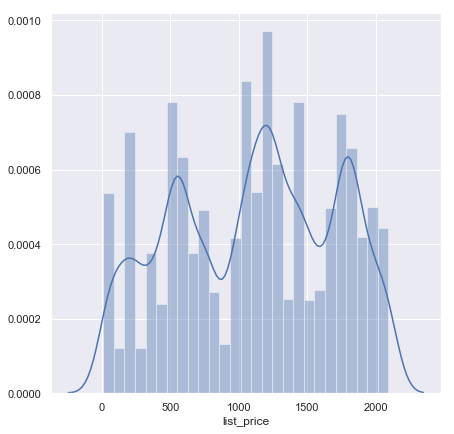

In [50]:
plt.figure(figsize=(7,7))
sns.distplot(df['list_price'])

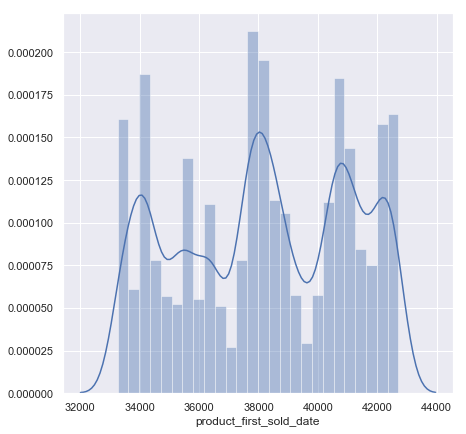

In [54]:
plt.figure(figsize=(7,7))
sns.distplot(df['product_first_sold_date'])

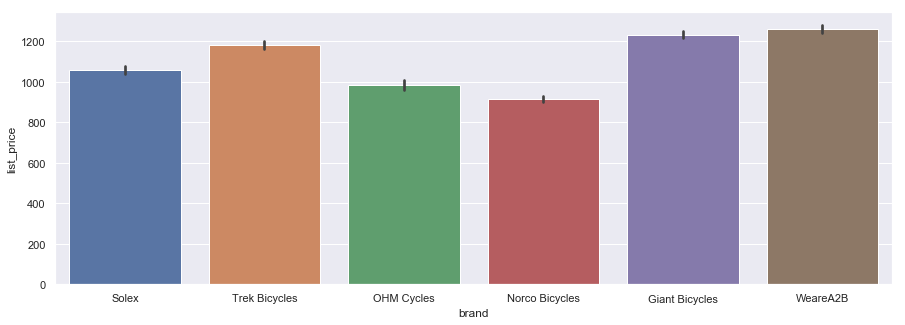

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x="brand", y='list_price', data=df)

<Figure size 1080x504 with 0 Axes>

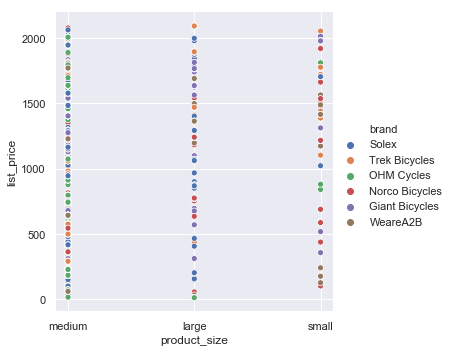

In [46]:
plt.figure(figsize=(15,7))
sns.relplot(x="product_size", y="list_price", hue="brand" ,data=df, kind="scatter")